## Timeseries di pandas

Mengingat time series, perlu mengingat Basic format datetime menurut ISO 8601 yaitu YYYY-mm-dd HH:MM:SS.

Persiapkan dataset:

```python
import pandas as pd
# Keyword argument 'parse_dates', yang jika di set True dan set index untuk kolom waktu tersebut maka kolom datetime 
# tersebut akan transform as datetime Pandas dan menjadi index.
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv', parse_dates=True, index_col='timestamp')
# Cetak 5 data teratas
print(gaq.head())
# Cetak info dari dataframe gaq
print('info')
print(gaq.info())
```



In [ ]:
# Silahkan dicoba disini



**pd.to_datetime** digunakan untuk men-transform salah satu kolom di dataframe menjadi datetime Pandas dan kemudian set menjadi index. Mari perhatikan:

```python
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Cetak 5 data teratas
print('Sebelum diubah dalam format datetime:\n', gaq.head())
# Ubah menjadi datetime
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
# Cetak 5 data teratas
print('Sesudah diubah dalam format datetime:\n', gaq.head())
```



In [ ]:
# Silahkan dicoba disini



Resampling untuk Time Series Data

Pandas time series juga memiliki fungsi resampling yang dapat berguna untuk:

1. Downsampling: Mengurangi baris datetime menjadi frekuensi yang lebih lambat, bisa dibilang juga mengurangi rows dataset menjadi lebih sedikit. Contoh: mengubah kolom datetime yang awalnya daily menjadi monthly
2. Upsampling: Kebalikan dari downsampling, menambah baris datetime menjadi frekuensi yang lebih cepat, menambah rows dataset dengan membuat kolom datetime menjadi lebih detail. Contoh: mengubah kolom datetime yang awalnya daily menjadi hourly

Dari resampling ini, kemudian dapat menerapkan metode statistik untuk transform value data yang ada (ex: mean, sum, count, etc). Tabel resampling:

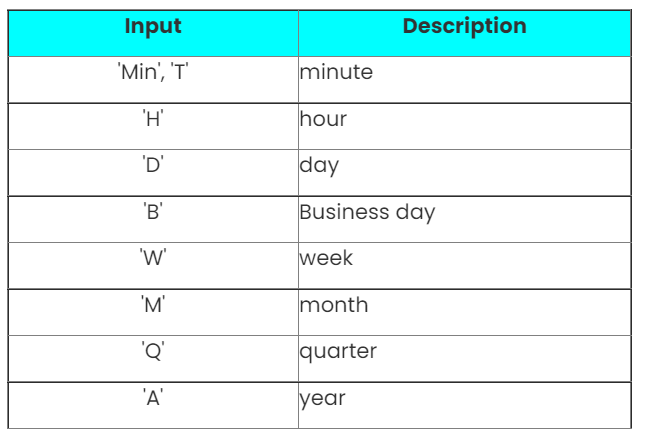

Perhatikan berikut ini downsampling:

```python
import pandas as pd
# Load https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-downsampling (5 teratas):\n', gaq.head())
# [1] Downsampling dari daily to weekly dan kita hitung maksimum untuk seminggu
gaq_weekly = gaq.resample('W').max()
print('Downsampling daily to weekly - max (5 teratas):\n', gaq_weekly.head())
# [2] Downsampling dari daily to quarterly dan kita hitung minimumnya untuk tiap quarter
gaq_quarterly = gaq.resample('Q').min()
print('Downsampling daily to quarterly - min (5 teratas):\n', gaq_quarterly.head())
```



In [ ]:
# Silahkan dicoba disini



Perhatikan berikut ini upsampling:

```python
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-upsampling (5 teratas):\n', gaq.head())
# Upsampling dari daily to hourly dan kita hitung reratanya
gaq_hourly = gaq.resample('H').mean()
print('Upsampling daily to hourly - mean (5 teratas):\n', gaq_hourly.head())
```



In [ ]:
# Silahkan dicoba disini



Resampling frequency:

```python
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-resampling (5 teratas):\n', gaq.head())
# Resample dari daily to 2 monthly, hitung reratanya, dan fillna = 'bfill'
gaq_2monthly = gaq.resample('2M').mean().fillna(method='bfill')
print('Resampling daily to 2 monthly - mean - ffill (5 teratas):\n', gaq_2monthly.head())
```



In [ ]:
# Silahkan dicoba disini



Plotting akan mempermudah dalam memahami pola data dengan ketentuan:


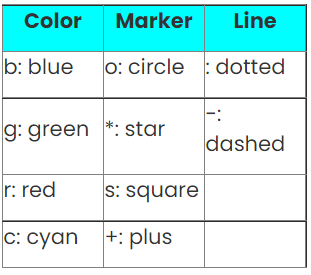

Perhatikan berikut ini:

```python
import pandas as pd
import matplotlib.pyplot as plt
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
# [1] Membuat pivot table yang menunjukkan waktu di baris nya dan masing-masing value dari pollutant nya dalam kolom
gaq_viz = gaq[['pollutant', 'value']].reset_index().set_index(['timestamp', 'pollutant'])
gaq_viz = gaq_viz.pivot_table(index='timestamp', columns='pollutant', aggfunc='mean').fillna(0)
gaq_viz.columns = gaq_viz.columns.droplevel(0)
print('Data (5 teratas):\n', gaq_viz.head())
# [2] Membuat fungsi yang memberikan default value 0 ketika value nya di bawah 0 dan apply ke setiap elemen dari dataset tersebut, kemudian menampilkannya sebagai chart
def default_val(val):
 if val < 0:
   return 0
 else:
   return val
line1 = gaq_viz.resample('M').mean().ffill().applymap(lambda x: default_val(x)).apply(lambda x: x/x.max()) # default value if value < 0 then 0, kemudian menghasilkan % value = value/max(value)
line1.plot(
   title = 'average value of each pollutant over months',
   figsize = (10, 10), #ukuran canvas 10px x 10px
   ylim = (0, 1.25), #memberikan batas tampilan y-axis hanya 0 sampai 125%
   subplots = True #memecah plot menjadi beberapa bagian sesuai dengan jumlah kolom
)
plt.ylabel('avg pollutant (%)')
plt.xlabel('month')
plt.show()
```



In [ ]:
# Silahkan dicoba disini



Apa yang terjadi apabila?

```python
gaq.loc[gaq['pollutant'] == 'so2', 'value'].resample('A').mean().plot()
```

